# Analysis of bike traffic on Fremont Bridge in Seattle

In [176]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Data Preprocessing

In [131]:
bike_traffic_data = pd.read_csv('raw_bike_traffic_data.csv')
bike_traffic_data.index = pd.to_datetime(bike_traffic_data['Date'])
bike_traffic_data.drop(columns=['Date'], inplace=True)

bike_traffic_data.rename(columns={'Fremont Bridge Total': 'Total', 'Fremont Bridge East Sidewalk': 'East', 'Fremont Bridge West Sidewalk': 'West'}, inplace=True)

styled_bike_traffic_data = bike_traffic_data.style.format(precision=0).hide(bike_traffic_data.index[3:-3], axis=0)
styled_bike_traffic_data

/var/folders/pm/cppmzmm510j_2083hwms8rdh0000gn/T/ipykernel_20576/2050655058.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bike_traffic_data.index = pd.to_datetime(bike_traffic_data['Date'])


,Total,East,West
Date,,,
2012-10-03 00:00:00,13,4,9
2012-10-03 01:00:00,10,4,6
2012-10-03 02:00:00,2,1,1
2023-01-31 21:00:00,22,3,19
2023-01-31 22:00:00,18,7,11
2023-01-31 23:00:00,6,3,3


### Locations of the most significant bikeways near the Fremont Bridge
![Seattle Bike Paths](resources/Seattle_map.jpg)

### Analysis of bike traffic changes due to the expansion and opening of new bike path sections near the bridge.

In [33]:
daily_bike_traffic_data = bike_traffic_data.groupby(bike_traffic_data.index.date).agg({"Total": "sum", "West": "sum", "East": "sum"})
daily_bike_traffic_data.index.name = "Date"
daily_bike_traffic_data.index = pd.to_datetime(daily_bike_traffic_data.index)

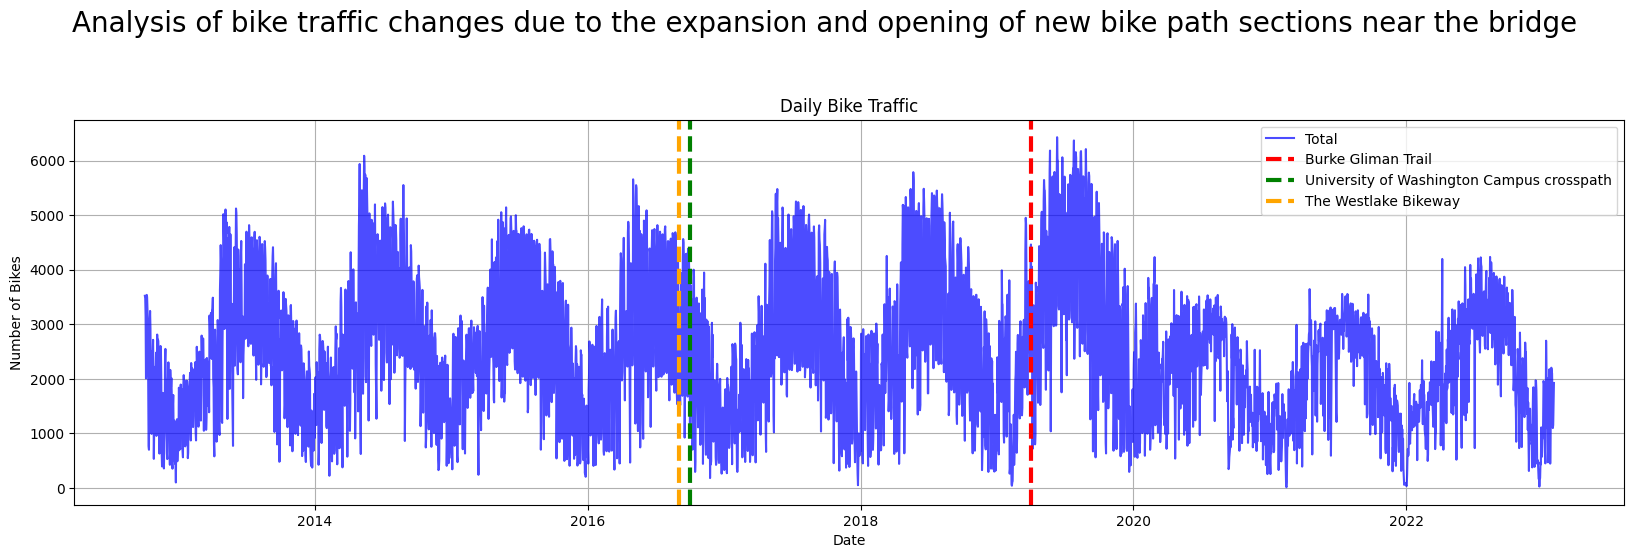

In [65]:
fig, ax = plt.subplots(figsize=(20, 5), facecolor='white')
fig.suptitle('Analysis of bike traffic changes due to the expansion and opening of new bike path sections near the bridge', fontsize=20, y=1.1)

ax.set_facecolor('white')
ax.plot(daily_bike_traffic_data.index, daily_bike_traffic_data['Total'], label='Total', color='blue', alpha=0.7)
ax.axvline(x=pd.to_datetime("2019-04-01"), color='red', linestyle='--', linewidth=3, label='Burke Gliman Trail')
ax.axvline(x=pd.to_datetime("2016-10-01"), color='green', linestyle='--', linewidth=3, label='University of Washington Campus crosspath')
ax.axvline(x=pd.to_datetime("2016-09-01"), color='orange', linestyle='--', linewidth=3, label='The Westlake Bikeway')
ax.set_title('Daily Bike Traffic')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Bikes')
ax.legend()
ax.grid()

We can see that expansions of bike paths in Seattle near the Fremont Bridge had a noticeable impact on bike traffic. <br><br>
The most significant development was the **Burke-Gilman Trail extension in 2019**, which led to a substantial **increase** in bike traffic. <br><br>
**The Westlake Bikeway and the UW campus crosspath** extensions had a less pronounced impact, but still contributed to a noticeable **upward trend** in traffic following their completion. <br><br>
Additionally, there is a clear **seasonal pattern**, with bike traffic peaking during the summer months and reaching its lowest levels in the winter. <br><br>
However, it's also evident that after 2020, bike traffic declined sharply, most likely as a result of the **COVID-19 pandemic**, which disrupted commuting patterns and reduced overall movement in the city.

### Analysis of bike traffic by side of the Fremont Bridge

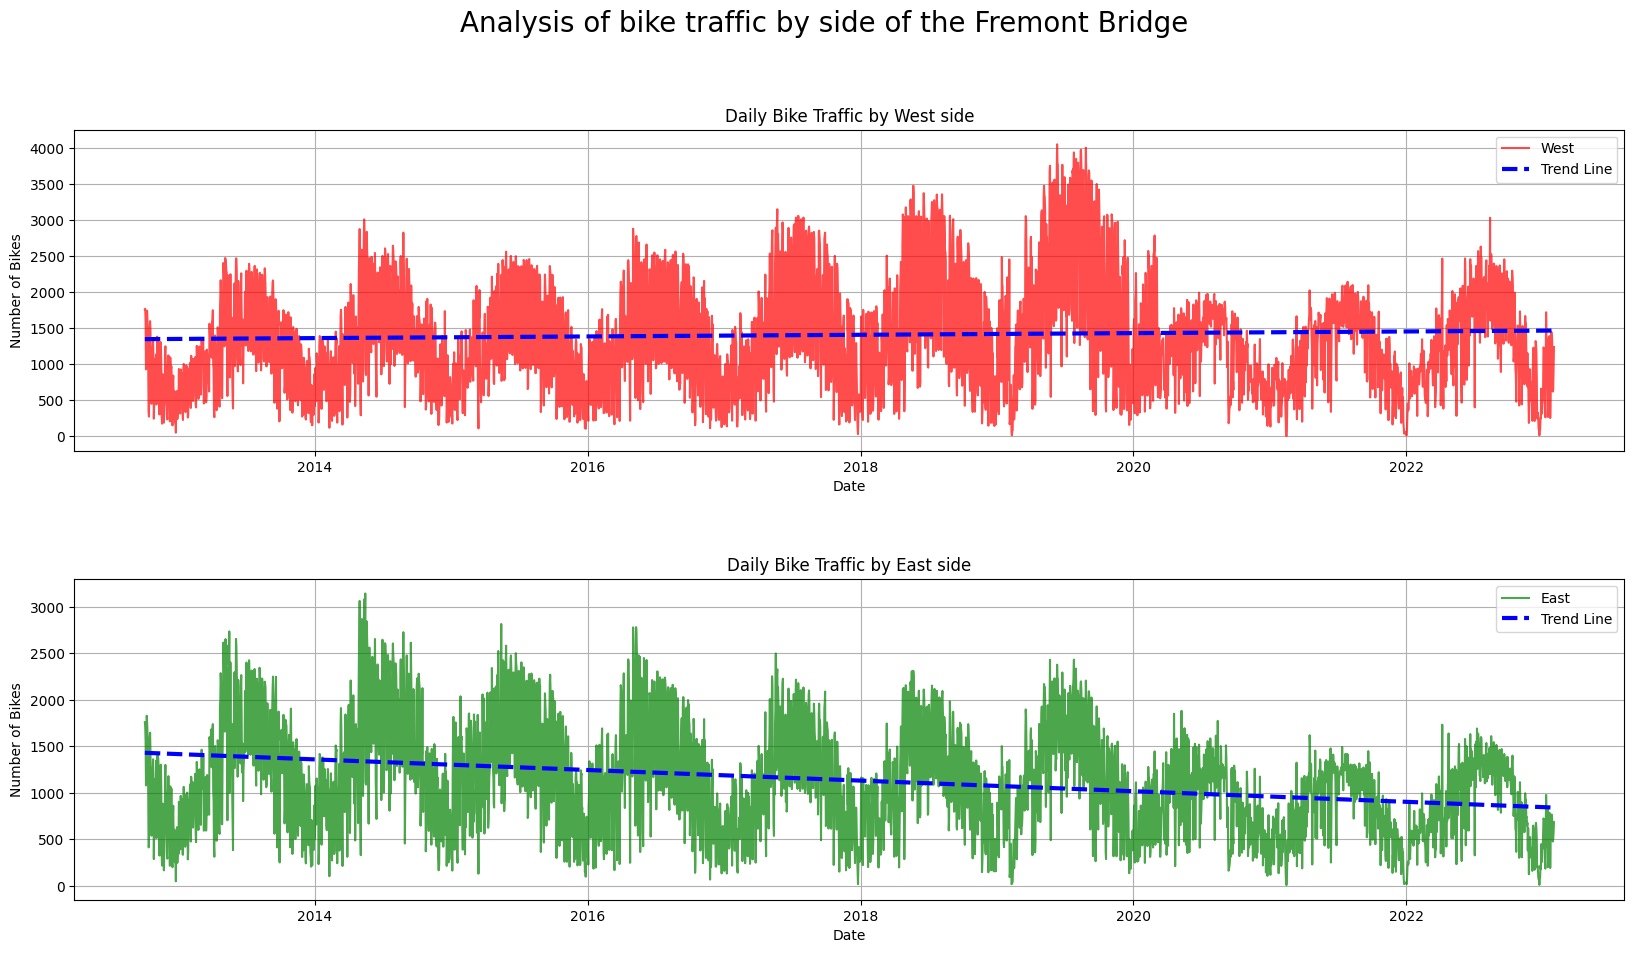

In [66]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 10), facecolor='white')
fig.suptitle('Analysis of bike traffic by side of the Fremont Bridge', fontsize=20, y=1.0)
fig.subplots_adjust(hspace=0.4)

palette = ['red', 'green']
for i, side in enumerate(['West', 'East']):
    axs[i].set_facecolor('white')
    axs[i].plot(daily_bike_traffic_data.index, daily_bike_traffic_data[side], color=palette[i], label=side, alpha=0.7)

    # Trend line
    x_numeric = mpl.dates.date2num(daily_bike_traffic_data.index)
    y = daily_bike_traffic_data[side].values
    z = np.polyfit(x_numeric, y, 1)
    p = np.poly1d(z)
    axs[i].plot(daily_bike_traffic_data.index, p(x_numeric), color='blue', linewidth=3, linestyle='--', label='Trend Line')
    
    axs[i].set_title('Daily Bike Traffic by ' + side + ' side')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Number of Bikes')
    axs[i].legend()
    axs[i].grid()

Despite the fact that in **2016** the **Westlake Bikeway** was opened — which connects directly to the **East side** of the Fremont Bridge and provides **superior cycling infrastructure** — the **West side** of the bridge continues to be more heavily used by cyclists, as clearly shown in the plots.
<br>

This outcome appears **counterintuitive**, as one might expect that improved infrastructure would lead to increased usage. However, the data consistently show **higher bike traffic on the West sidewalk** throughout the entire time period.
<br>

It is also worth noting that although Seattle follows **right-hand traffic** rules for vehicles, the **sidewalks on the Fremont Bridge support bidirectional bicycle traffic**, which likely **reduces the impact** of vehicle traffic norms on cyclist behavior. Nevertheless, it is possible that **habitual usage patterns** and **cyclist preferences** have led to a lasting tendency to use the **West side** more frequently.

#### Whats the reason for this difference between the sides?
![Reddit Opinion](resources/reddit1.png)
![Reddit Opinion](resources/reddit2.png)
![Reddit Opinion](resources/reddit3.png)

### Analysis of bike traffic by hours (rush hours) and week days

In [69]:
products = [['Weekday', 'Weekend'], ['Total', 'East', 'West']]
columns = pd.MultiIndex.from_product(products)
weekday_weekend_hourly_bike_traffic_data = pd.DataFrame(index=bike_traffic_data.index.hour, columns=columns)

weekday_data = bike_traffic_data[bike_traffic_data.index.weekday < 5]
weekday_weekend_hourly_bike_traffic_data['Weekday', 'Total'] = weekday_data.groupby(weekday_data.index.hour).agg({"Total": "mean"})
weekday_weekend_hourly_bike_traffic_data['Weekday', 'East'] = weekday_data.groupby(weekday_data.index.hour).agg({"East": "mean"})
weekday_weekend_hourly_bike_traffic_data['Weekday', 'West'] = weekday_data.groupby(weekday_data.index.hour).agg({"West": "mean"})
weekend_data = bike_traffic_data[bike_traffic_data.index.weekday >= 5]
weekday_weekend_hourly_bike_traffic_data['Weekend', 'Total'] = weekend_data.groupby(weekend_data.index.hour).agg({"Total": "mean"})
weekday_weekend_hourly_bike_traffic_data['Weekend', 'East'] = weekend_data.groupby(weekend_data.index.hour).agg({"East": "mean"})
weekday_weekend_hourly_bike_traffic_data['Weekend', 'West'] = weekend_data.groupby(weekend_data.index.hour).agg({"West": "mean"})

weekday_weekend_hourly_bike_traffic_data.index.name = "Hour"
weekday_weekend_hourly_bike_traffic_data.index = pd.to_datetime(weekday_weekend_hourly_bike_traffic_data.index, format='%H')
weekday_weekend_hourly_bike_traffic_data.index = weekday_weekend_hourly_bike_traffic_data.index.strftime('%H')
weekday_weekend_hourly_bike_traffic_data.index = weekday_weekend_hourly_bike_traffic_data.index.astype(int)

weekday_weekend_hourly_bike_traffic_data = weekday_weekend_hourly_bike_traffic_data[:24]

styled_weekday_weekend_hourly_bike_traffic_data = weekday_weekend_hourly_bike_traffic_data.style.format(precision=0).hide(weekday_weekend_hourly_bike_traffic_data.index[3:-3], axis=0)
styled_weekday_weekend_hourly_bike_traffic_data

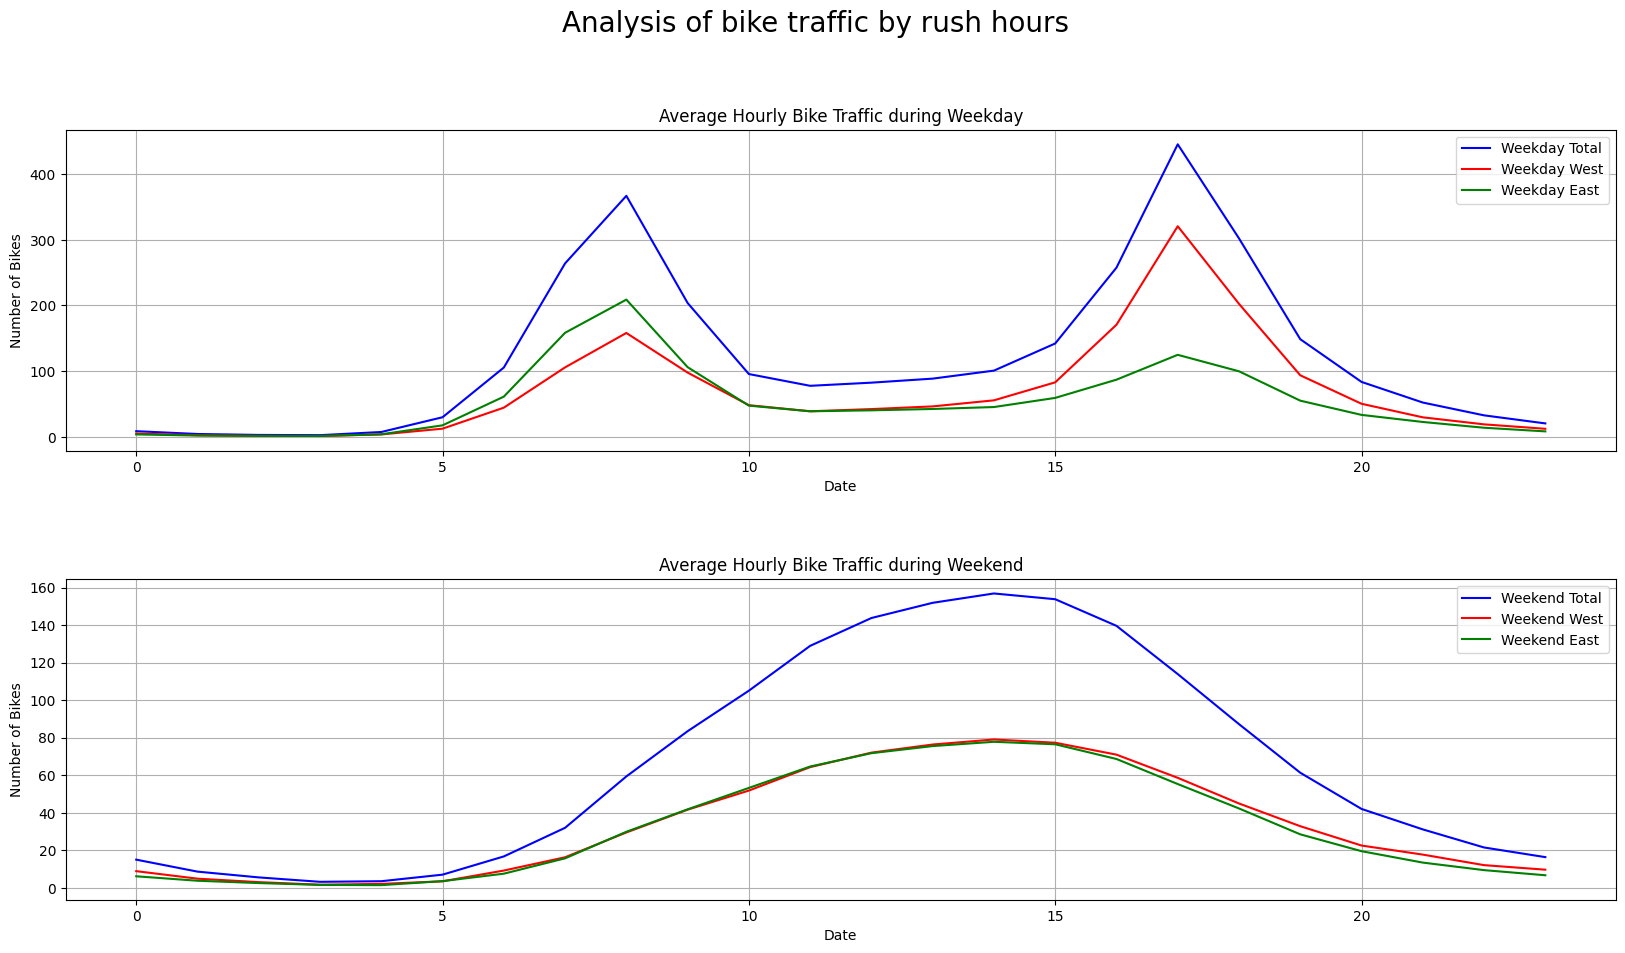

In [73]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 10), facecolor='white')
fig.suptitle('Analysis of bike traffic by rush hours', fontsize=20, y=1.0)
fig.subplots_adjust(hspace=0.4)

palette = ['blue', 'red', 'green']
for i, week_part in enumerate(['Weekday', 'Weekend']):
    axs[i].set_facecolor('white')
    for j, side in enumerate(['Total', 'West', 'East']):
        axs[i].plot(weekday_weekend_hourly_bike_traffic_data.index, weekday_weekend_hourly_bike_traffic_data[week_part, side], label=f"{week_part} {side}", color=palette[j])
    axs[i].set_title(f'Average Hourly Bike Traffic during {week_part}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Number of Bikes')
    axs[i].legend()
    axs[i].grid()

Traffic on **Weekdays**

During the week, there are **two distinct peaks** in bike traffic:

- **Around 8:00 AM** – a morning peak caused by people **commuting to work or university**.
- **Around 5:00 PM** – an afternoon peak when people **return home**.

This reflects a classic **urban mobility pattern**, with **symmetrical peaks** clearly visible. These are known as **traffic maxima**.

Traffic on **Weekends**

On weekends, the traffic distribution is **much more even**. It resembles a **normal distribution**, though **slightly shifted to the right** (towards the afternoon). This is **expected**, because:

- People tend to **plan their day more freely**.
- The main activity happens in the **afternoon** (e.g., after **lunch**).
- The smoother peak likely reflects **family outings** and general leisure activities.


Positional Differences – **Bridge Side Preference**

**Weekend**
- There is **no noticeable difference** between the number of people using the **East** or **West** side of the bridge – movement appears to be **evenly distributed** and **spontaneous**.

**Weekday**
- In the **morning**, people tend to use the **East side** of the bridge.
- In the **afternoon**, the **West side** becomes more heavily used.

At first glance, this might seem **illogical**, especially if we expect a **morning flow toward the city center** and an **afternoon flow away from it**, similar to **right-hand vehicular traffic**. However, as we mentioned earlier, **sidewalks and bike lanes do not follow the same traffic rules as cars**, so this asymmetry is actually **reasonable**.

### Identifying Trends - Heatmap Analysis

#### By Hours and Weekdays

In [108]:
bike_traffic_by_weekday_data = daily_bike_traffic_data.groupby(daily_bike_traffic_data.index.weekday).agg({"Total": "mean", "West": "mean", "East": "mean"})
bike_traffic_by_weekday_data.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bike_traffic_by_weekday_data.index.name = "Day"
bike_traffic_by_weekday_data = bike_traffic_by_weekday_data[['Total', 'East', 'West']]

styled_bike_traffic_by_weekday_data = bike_traffic_by_weekday_data.style.format(precision=0).hide(bike_traffic_by_weekday_data.index[3:-3], axis=0)
styled_bike_traffic_by_weekday_data

,Total,East,West
Day,,,
Monday,2858,1248,1611
Tuesday,3097,1351,1746
Wednesday,3090,1350,1740
Friday,2648,1169,1478
Saturday,1636,793,843
Sunday,1539,761,778


In [106]:
products = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ['Total', 'East', 'West']]
columns = pd.MultiIndex.from_product(products)
weekday_hourly_bike_traffic_data = pd.DataFrame(index=bike_traffic_data.index.hour, columns=columns)

for idx, i in enumerate(products[0]):
    weekday_data = bike_traffic_data[bike_traffic_data.index.weekday == idx]
    for side in ['Total', 'East', 'West']:
        weekday_hourly_bike_traffic_data[i, side] = weekday_data.groupby(weekday_data.index.hour).agg({side: "mean"})

weekday_hourly_bike_traffic_data.index.name = "Hour"
weekday_hourly_bike_traffic_data.index = pd.to_datetime(weekday_hourly_bike_traffic_data.index, format='%H')
weekday_hourly_bike_traffic_data.index = weekday_hourly_bike_traffic_data.index.strftime('%H')
weekday_hourly_bike_traffic_data.index = weekday_hourly_bike_traffic_data.index.astype(int)
weekday_hourly_bike_traffic_data = weekday_hourly_bike_traffic_data[:24]

weekday_hourly_total_bike_traffic_data = weekday_hourly_bike_traffic_data.xs('Total', level=1, axis=1)

styled_weekday_hourly_bike_traffic_data = weekday_hourly_bike_traffic_data.style.format(precision=0).hide(weekday_hourly_bike_traffic_data.index[3:-3], axis=0)
styled_weekday_hourly_bike_traffic_data

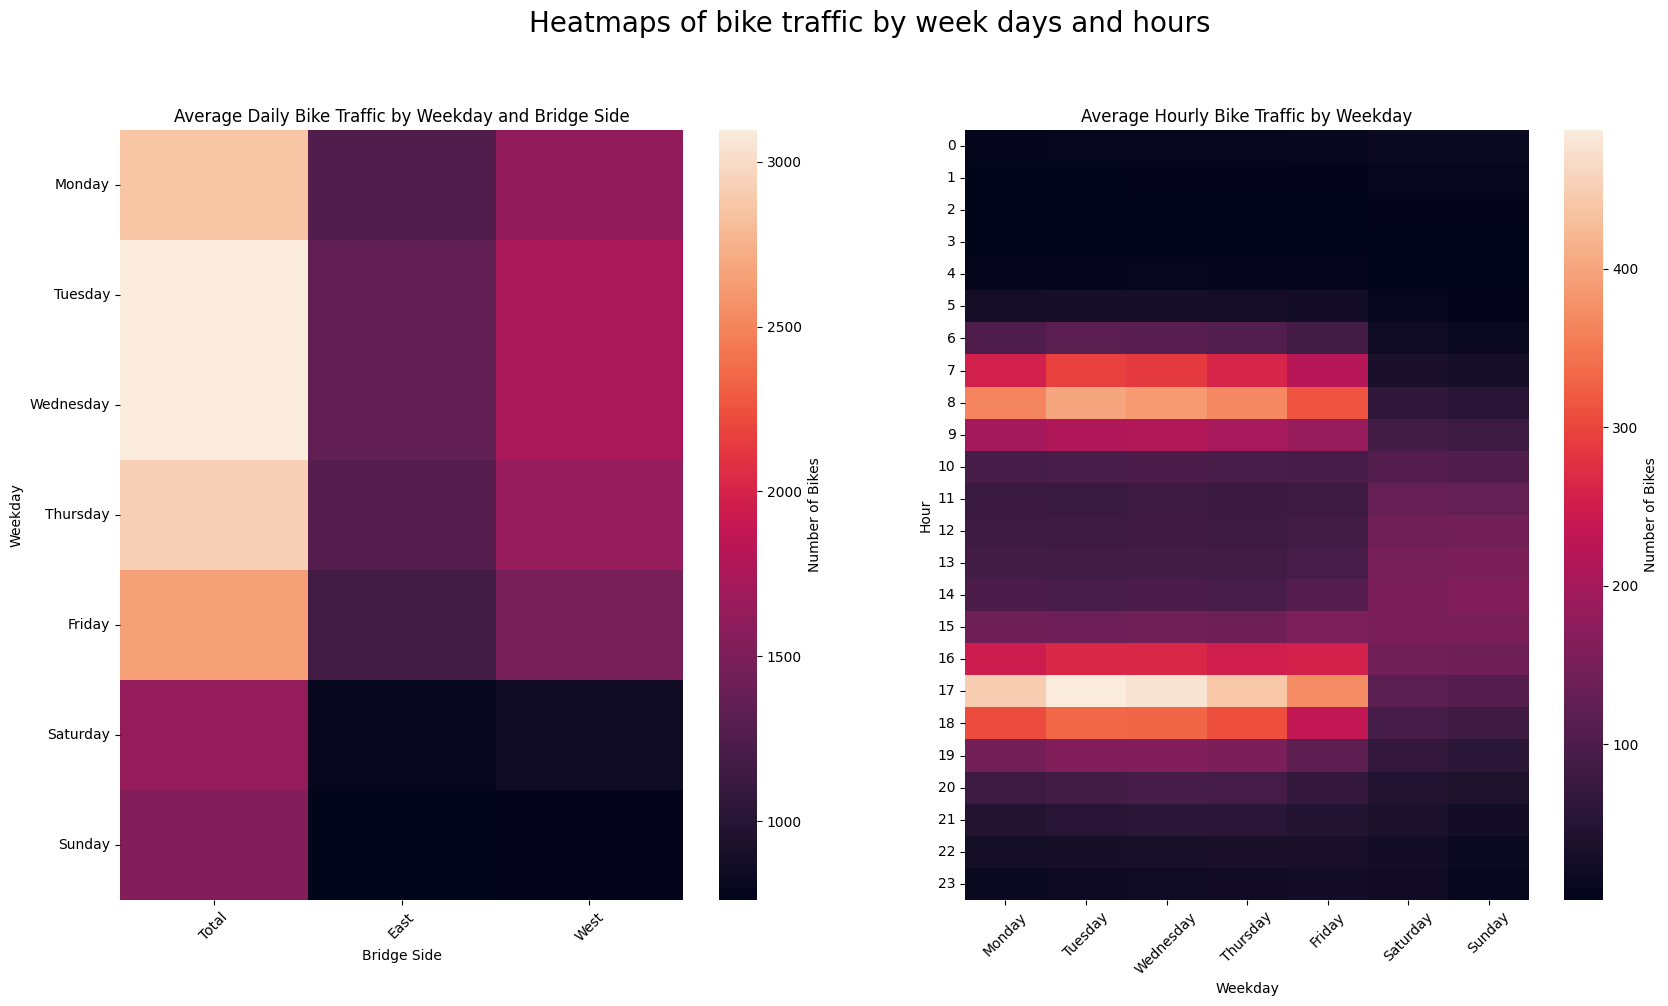

In [116]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), facecolor='white')
fig.suptitle('Heatmaps of bike traffic by week days and hours', fontsize=20, y=1.0)
fig.subplots_adjust(hspace=0.3)

ylabels = ['Weekday', 'Hour']
xlabels = ['Bridge Side', 'Weekday']
titles = ['Average Daily Bike Traffic by Weekday and Bridge Side', 'Average Hourly Bike Traffic by Weekday']
for i, data in enumerate([bike_traffic_by_weekday_data, weekday_hourly_total_bike_traffic_data]):
    sns.heatmap(data, cbar_kws={'label': 'Number of Bikes'}, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
    axs[i].set_yticklabels(axs[i].get_yticklabels(), rotation=0)
    axs[i].set_title(titles[i])
    axs[i].set_xlabel(xlabels[i])
    axs[i].set_ylabel(ylabels[i])

plt.show()

- **Weekday vs. Weekend Patterns**:
  - Bike traffic is **significantly higher on weekdays**, especially from **Monday to Friday**.
  - **Weekend traffic drops** noticeably, particularly on **Sunday**, where it’s the lowest overall.

- **Bridge Side Usage**:
  - On weekdays, **East and West bridge sides** show fairly balanced usage.
  - However, the **West side** sees a **slightly higher usage**.

- **Hourly Trends**:
  - There are **two distinct traffic peaks** during weekdays:
    - **Morning peak**: Around **7–9 AM**, likely corresponding to commute to work.
    - **Evening peak**: Around **4–6 PM**, matching typical return commute times.
  - **Weekend traffic** is more **evenly distributed** throughout the day with no sharp peaks.

- **Overall**:
  - The heatmaps clearly reflect **commuter behavior** during weekdays and a **more relaxed or recreational pattern** on weekends, which confirms the previous findings discussed.


#### By Months and Years

In [97]:
bike_traffic_by_month_data = daily_bike_traffic_data.groupby(daily_bike_traffic_data.index.month).agg({"Total": "mean", "West": "mean", "East": "mean"})
bike_traffic_by_month_data.index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bike_traffic_by_month_data.index.name = "Month"
bike_traffic_by_month_data = bike_traffic_by_month_data[['Total', 'East', 'West']]

styled_bike_traffic_by_month_data = bike_traffic_by_month_data.style.format(precision=0).hide(bike_traffic_by_month_data.index[3:-3], axis=0)
styled_bike_traffic_by_month_data

,Total,East,West
Month,,,
January,1686,757,929
February,1721,776,945
March,2118,954,1164
October,2531,1124,1408
November,1905,829,1076
December,1337,585,752


In [99]:
bike_traffic_by_year_data = daily_bike_traffic_data.groupby(daily_bike_traffic_data.index.year).agg({"Total": "mean", "West": "mean", "East": "mean"})
bike_traffic_by_year_data.index.name = "Month"
bike_traffic_by_year_data = bike_traffic_by_year_data[['Total', 'East', 'West']]

styled_bike_traffic_by_year_data = bike_traffic_by_year_data.style.format(precision=0).hide(bike_traffic_by_year_data.index[3:-3], axis=0)
styled_bike_traffic_by_year_data

,Total,East,West
Month,,,
2012,1697,871,825
2013,2543,1312,1231
2014,2757,1412,1345
2021,1961,811,1150
2022,2185,880,1305
2023,1536,584,953


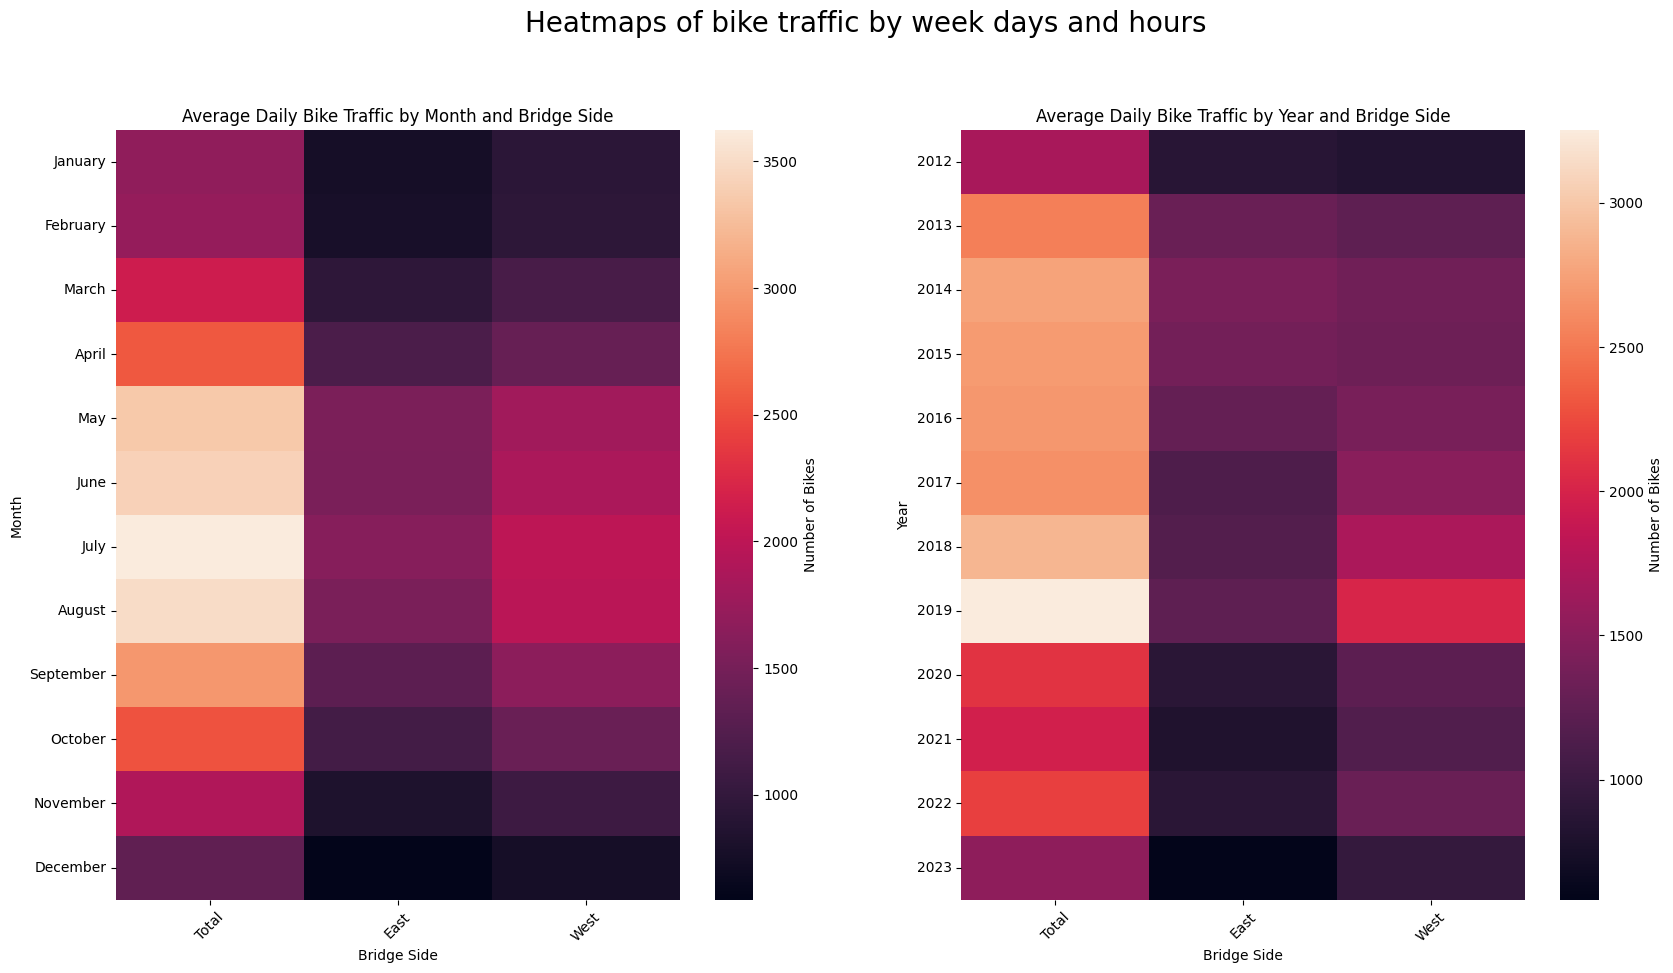

In [118]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), facecolor='white')
fig.suptitle('Heatmaps of bike traffic by week days and hours', fontsize=20, y=1.0)
fig.subplots_adjust(hspace=0.3)

ylabels = ['Month', 'Year']
for i, data in enumerate([bike_traffic_by_month_data, bike_traffic_by_year_data]):
    sns.heatmap(data, cbar_kws={'label': 'Number of Bikes'}, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
    axs[i].set_yticklabels(axs[i].get_yticklabels(), rotation=0)
    axs[i].set_title(f"Average Daily Bike Traffic by {ylabels[i]} and Bridge Side")
    axs[i].set_xlabel('Bridge Side')
    axs[i].set_ylabel(ylabels[i])

plt.show()

- **Seasonality**: The highest bike traffic is observed between **May and August**, indicating a strong seasonal trend with summer months being the most active.
- **Yearly Trend**: Bike traffic steadily increased until **2019**, followed by a **sharp drop in 2020**, likely due to the COVID-19 pandemic. The traffic has not fully recovered to pre-pandemic levels since.
- **Bridge Usage**: The **West side** consistently has more traffic than the East across all months and years, though the difference narrows in winter months.

### Analysis of Bike Traffic During Curfew Hours

In May 2020, in response to the protests following the death of George Floyd, a curfew was introduced in Seattle. <br>
The curfew was in effect from 8:00 PM to 5:00 AM but was lifted after a few days. <br>
The increase in the number of cyclists on the second day suggests that the restrictions likely did not achieve their intended effect.

In [138]:
first_daty_curfew_start = pd.to_datetime("2020-05-30 20:00:00")
first_day_curfew_end = pd.to_datetime("2020-05-31 05:00:00")
second_day_curfew_start = pd.to_datetime("2020-05-31 20:00:00")
second_day_curfew_end = pd.to_datetime("2020-06-01 05:00:00")

first_day_curfew_bikers = bike_traffic_data[(bike_traffic_data.index >= first_daty_curfew_start) & (bike_traffic_data.index <= first_day_curfew_end)]['Total'].sum()
second_day_curfew_bikers = bike_traffic_data[(bike_traffic_data.index >= second_day_curfew_start) & (bike_traffic_data.index <= second_day_curfew_end)]['Total'].sum()

print(f"Number of bikers during the first day of curfew: {first_day_curfew_bikers:.0f}")
print(f"Number of bikers during the second day of curfew: {second_day_curfew_bikers:.0f}")

Number of bikers during the first day of curfew: 24
Number of bikers during the second day of curfew: 110


|                        | 30.05.2020 – 31.05.2020    20:00–5:00 | 31.05.2020 – 01.06.2020    20:00–5:00 | Łącznie |
|------------------------|--------------------------------------|---------------------------------------|---------|
| **Liczba rowerzystów** | 24                                   | 110                                   | 582     |


In [142]:
may_range_data = bike_traffic_data[
    (bike_traffic_data.index.month == 5) & (bike_traffic_data.index.day >= 30) |
    (bike_traffic_data.index.month == 6) & (bike_traffic_data.index.day == 1)
]

daily_totals = may_range_data['Total'].groupby(may_range_data.index.date).sum()

daily_totals.index = pd.to_datetime(daily_totals.index)
average_per_year = daily_totals.groupby(daily_totals.index.year).mean()

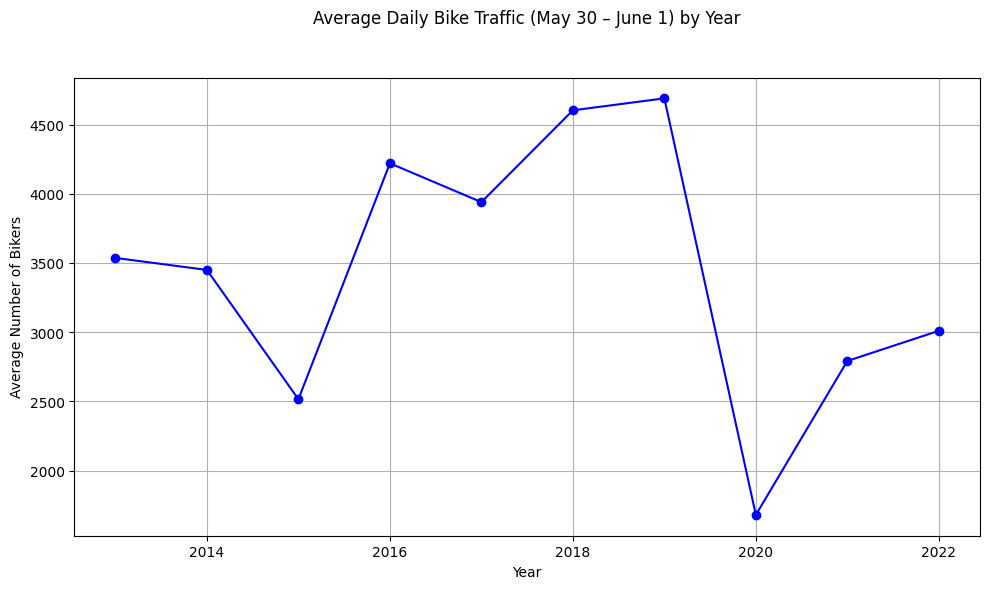

In [152]:
fig, axs = plt.subplots(figsize=(10, 6), facecolor='white')

plt.plot(average_per_year.index, average_per_year.values, marker='o', color='blue')
plt.title('Average Daily Bike Traffic (May 30 – June 1) by Year', y=1.1)
plt.xlabel('Year')
plt.ylabel('Average Number of Bikers')
plt.grid(True)
plt.tight_layout()

plt.show()

The plot clearly shows a noticeable dip in average bike traffic during the period of **May 30 to June 1, 2020**, which corresponds to the time when a curfew was enforced in Seattle following the George Floyd protests. <br><br>
This indicates that the curfew **had a measurable impact on reducing bike activity**. However, the presence of some bikers during curfew hours suggests that **the effect was limited and not absolute** — the restrictions were followed by many, but not all.

### Analysis of bike traffic changes due to weather impact (2022).

In [156]:
col_names = ['DY', 'MAX', 'MIN', 'AVG', 'DEP', 'HDD', 'CDD', 'WTR', 'SNW', 'DPTH', 'SPD_AVG', 'SPD_MX', 'DIR', 'MIN_SUN', 'PSBL', 'S-S', 'WX', 'SPD', 'DR']
weather = pd.read_csv('raw_weather_data/2022_01.txt', skiprows=17, nrows=31, sep=r' +', names=col_names, engine='python')
for i in range(2, 13):
    nrow = 30
    if i == 2:       nrow = 28
    elif i == 8:     nrow = 31
    elif i == 9:     nrow = 30
    elif i == 10:    nrow = 31
    elif i == 11:    nrow = 30
    elif i == 12:    nrow = 31
    elif i % 2 != 0: nrow = 31

    if i < 10: i = '0' + str(i)
    weather_temp = pd.read_csv(f'raw_weather_data/2022_{i}.txt', skiprows=17, nrows=nrow, sep=r' +', names=col_names, engine='python')
    weather = pd.concat([weather, weather_temp], ignore_index=True, axis=0)

weather.index = pd.date_range(start='2022-01-01', periods=len(weather), freq='D')
weather.drop(columns=['DY', 'DEP', 'HDD', 'CDD', 'DIR', 'MIN_SUN', 'PSBL', 'WX', 'SPD', 'DR'], inplace=True)
weather = weather.rename(columns={'MAX': 'Max', 'AVG': 'Avg', 'MIN': 'Min', 'WTR': 'Total', 'SNW':'Fall', 'DPTH':'Depth', 'SPD_AVG':'Avg speed', 'SPD_MX':'Max speed', 'S-S':'Cloud cover'})
weather.columns = pd.MultiIndex.from_tuples([
    ('Temperature', 'Max'),
    ('Temperature', 'Min'),
    ('Temperature', 'Avg'),
    ('Precipitation', 'Total'),
    ('Snow', 'Fall'),
    ('Snow', 'Depth'),
    ('Wind', 'Avg speed'),
    ('Wind', 'Max speed'),
    ('Sky', 'Cloud cover')
])

weather.replace("M", np.nan, inplace=True)
for i in ['Min', 'Avg', 'Max']: weather['Temperature', i] = (weather['Temperature', i].astype(float) - 32) * 5/9
weather['Precipitation', 'Total'] = weather['Precipitation', 'Total'].replace('T', 0).astype(float) * 25.4
for i in ['Fall', 'Depth']: weather['Snow', i] = weather['Snow', i].replace('T', 0).astype(float) * 25.4
for i in ['Avg speed', 'Max speed']: weather['Wind', i] = weather['Wind', i].astype(float) * 0.44704
weather['Sky', 'Cloud cover'] = weather['Sky', 'Cloud cover'].astype(float) / 10

weather_data = weather[[('Temperature', 'Min'), ('Temperature', 'Avg'), ('Temperature', 'Max'), ('Precipitation', 'Total'), ('Snow', 'Fall'), ('Snow', 'Depth'), ('Wind', 'Avg speed'), ('Wind', 'Max speed'), ('Sky', 'Cloud cover')]]
weather_data.index.name = 'Date'

weather_data

Temperature                      Precipitation Snow        \
                   Min       Avg        Max         Total Fall Depth   
Date                                                                   
2022-01-01   -5.555556 -2.222222   1.111111         0.000  0.0  76.2   
2022-01-02   -1.111111  2.777778   6.111111        20.066  0.0  76.2   
2022-01-03    0.555556  2.777778   5.000000        12.446  0.0   0.0   
2022-01-04    1.666667  3.888889   5.555556         5.588  0.0   0.0   
2022-01-05    1.111111  2.777778   3.888889         8.382  0.0   0.0   
...                ...       ...        ...           ...  ...   ...   
2022-12-27    6.666667  9.444444  11.666667         6.858  0.0   0.0   
2022-12-28    5.000000  6.666667   7.777778         0.762  0.0   0.0   
2022-12-29    5.000000  6.666667   7.777778         8.890  0.0   0.0   
2022-12-30    5.555556  8.888889  11.666667         9.144  0.0   0.0   
2022-12-31    6.111111  7.777778   9.444444         0.254  0.0   0.0   

                Wind                   Sky  
           Avg speed Max speed Cloud cover  
Date                                        
2022-01-01  3.576320   5.36448         0.8  
2022-01-02  3.799840   8.94080         1.0  
2022-01-03  5.140960  11.62304         0.9  
2022-01-04  4.336288   9.83488         0.9  
2022-01-05  2.235200   4.47040         1.0  
...              ...       ...         ...  
2022-12-27  7.733792  16.54048         1.0  
2022-12-28  5.766816  12.51712         0.8  
2022-12-29  2.771648   7.59968         1.0  
2022-12-30  6.437376  11.62304         0.9  
2022-12-31  4.470400   9.38784         0.9  

[365 rows x 9 columns]

In [186]:
R_corr = pd.DataFrame(index=weather_data.columns, columns=daily_bike_traffic_data.columns)

for weather_col in weather_data.columns:
    for traffic_col in daily_bike_traffic_data.columns:
        r = weather_data[weather_col].corr(daily_bike_traffic_data[traffic_col])
        R_corr.loc[weather_col, traffic_col] = r

R_corr = R_corr.astype(float)
R_corr

Total      West      East
Temperature   Min          0.701655  0.679126  0.713808
              Avg          0.770827  0.742272  0.790259
              Max          0.788875  0.757500  0.812116
Precipitation Total       -0.451900 -0.434036 -0.464786
Snow          Fall        -0.147524 -0.141992 -0.151355
              Depth       -0.236888 -0.231044 -0.238268
Wind          Avg speed   -0.237627 -0.227817 -0.245192
              Max speed   -0.345763 -0.339481 -0.344373
Sky           Cloud cover -0.569683 -0.548878 -0.583611

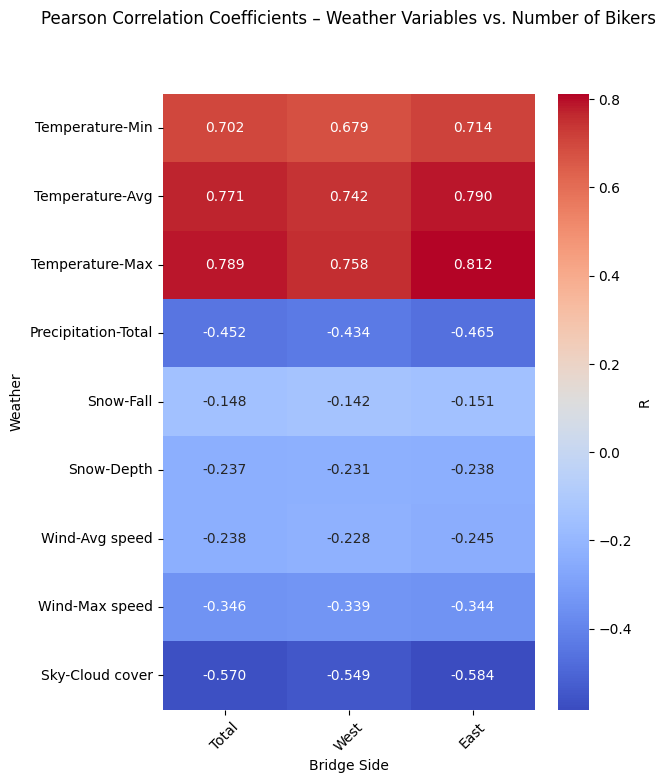

In [187]:
# Wykresy
fig, ax = plt.subplots(figsize=(6, 8), facecolor='white')

sns.heatmap(R_corr, annot=True, fmt=".3f", cmap="coolwarm", cbar_kws={'label': 'R'}, ax=ax)
ax.set_title("Pearson Correlation Coefficients – Weather Variables vs. Number of Bikers", y=1.1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel('Bridge Side')
ax.set_ylabel('Weather')

plt.show()

**Key Insights:**
- Temperature (especially max) has the **strongest positive correlation** with biking activity.
- Cloud cover and precipitation have the **strongest negative correlation**.
- Wind and snow show moderate to weak negative effects.

These correlations suggest that warmer and clearer days encourage more biking, while adverse conditions such as rain, wind, and clouds reduce biking activity.

In [208]:
weather_data_flattened = weather_data
weather_data_flattened.columns = [' '.join(col).strip() for col in weather_data.columns.values]

df = pd.merge(daily_bike_traffic_data, weather_data_flattened, on='Date')

df.dropna(inplace=True)
df.columns = df.columns.str.replace(' ', '', regex=False)
df
y = df['Total']
X = df[['TemperatureAvg', 'PrecipitationTotal', 'WindAvgspeed', 'SkyCloudcover']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     200.7
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           9.08e-90
Time:                        17:43:57   Log-Likelihood:                -2790.0
No. Observations:                 360   AIC:                             5590.
Df Residuals:                     355   BIC:                             5609.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1681.3123    152

**Summary of OLS Regression Results**

- **Model Fit**: The model explains approximately **69.3%** of the variance in the dependent variable (`Total`) as indicated by **R-squared = 0.693**. The adjusted R-squared (0.690) confirms a good model fit, accounting for the number of predictors.

- **Model Significance**: The **F-statistic (200.7)** and its **very low p-value (< 0.0001)** indicate that the overall model is statistically significant.

- **Predictor Significance**:
  - `TemperatureAvg` has a **positive and highly significant** effect on `Total` (**coef = 96.56**, p < 0.001).
  - `PrecipitationTotal` and `WindAvgspeed` have **negative and significant** effects.
  - `SkyCloudcover` shows a **strong negative impact**, suggesting cloudier conditions reduce the response variable.

- **Precision and Confidence**: All coefficients have reasonably low **standard errors**, and their 95% confidence intervals **do not include zero**, supporting their significance.

- **Residual Diagnostics**:
  - **Durbin-Watson = 1.159** suggests some **positive autocorrelation** in residuals.
  - **Omnibus, Jarque-Bera, skewness, and kurtosis** indicate that **residuals are approximately normally distributed**.

- **Multicollinearity**: The **condition number (87.3)** is within an acceptable range, indicating **no severe multicollinearity**.

- **Model Selection Criteria**: AIC = 5590 and BIC = 5609 can be used for model comparison. Lower values are preferred when evaluating alternative models.
